In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from collections import defaultdict 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [15]:
ls data/tire_strategy

Tire Strategy Data - 2015_abu_dhabi.csv
Tire Strategy Data - 2015_austrailia.csv
Tire Strategy Data - 2015_austria.csv
Tire Strategy Data - 2015_bahrain.csv
Tire Strategy Data - 2015_belgium.csv
Tire Strategy Data - 2015_brazil.csv
Tire Strategy Data - 2015_brittan.csv
Tire Strategy Data - 2015_canada.csv
Tire Strategy Data - 2015_china.csv
Tire Strategy Data - 2015_hungry.csv
Tire Strategy Data - 2015_italy.csv
Tire Strategy Data - 2015_japan.csv
Tire Strategy Data - 2015_malaysia.csv
Tire Strategy Data - 2015_mexico.csv
Tire Strategy Data - 2015_monaco.csv
Tire Strategy Data - 2015_russia.csv
Tire Strategy Data - 2015_singapore.csv
Tire Strategy Data - 2015_spain.csv
Tire Strategy Data - 2015_usa.csv
Tire Strategy Data - 2016_austrailia.csv
Tire Strategy Data - 2016_bahrain.csv
Tire Strategy Data - 2016_china.csv


In [62]:
strategies = ['2015_abudhabi.csv',
'2015_austrailia.csv',
'2015_austria.csv',
'2015_bahrain.csv',
'2015_belgium.csv',
'2015_brazil.csv',
'2015_brittan.csv',
'2015_canada.csv',
'2015_china.csv',
'2015_hungry.csv',
'2015_italy.csv',
'2015_japan.csv',
'2015_malaysia.csv',
'2015_mexico.csv',
'2015_monaco.csv',
'2015_russia.csv',
'2015_singapore.csv',
'2015_spain.csv',
'2015_usa.csv',
'2016_austrailia.csv',
'2016_bahrain.csv',
'2016_china.csv']


In [151]:
def get_best_tire(df):
    arr = df.values
    d = defaultdict(int)
    for row in arr:
        for item in row[1:]:
            try:
                tire, laps = item.split()
                laps = int(laps.replace('(', '').replace(')', ''))
                d[tire] += laps
            except:
                pass
    return max(d)

def get_tire_label(flist):
    best_tires = []
    for filename in flist:
        df = pd.read_csv('data/tire_strategy/Tire Strategy Data - {}'.format(filename))
        tire = get_best_tire(df)
        year, name = filename.split('_')
        name = name.replace('.csv', '')
        best_tires.append([name, year, tire])
    return pd.DataFrame(data=best_tires, columns=['NAME', 'YEAR', 'TIRE'])


In [123]:
china = pd.read_csv('data/tire_strategy/Tire Strategy Data - {}'.format('2016_china.csv'))
get_best_tire(china)

'Soft'

In [159]:
tires = get_tire_label(strategies)
tires#.sort_values(by=['NAME', 'YEAR'], inplace=True)
tires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 3 columns):
NAME    22 non-null object
YEAR    22 non-null object
TIRE    22 non-null object
dtypes: object(3)
memory usage: 704.0+ bytes


In [153]:
df = pd.read_csv('data/track_profiles - Sheet1.csv')

In [162]:
df['NAME'] = df['NAME'].apply(lambda x: x.lower())
df#.sort_values(by=['NAME', 'YEAR'], inplace=True)
tires['YEAR'] = tires['YEAR'].astype(int)

In [163]:
df.merge(tires, how='left', left_on=['NAME', 'YEAR'], right_on=['NAME', 'YEAR'])

,NAME,YEAR,LENGTH,LAPS,DOWNFORCE,LATERAL,ASPHALT_ABR,ASPHALT_GRP,TIRE_STRESS,AIR_TEMP_MAX,AIR_TEMP_MIN,T_TEMP_MAX,T_TEMP_MIN,SECTOR_1,TIME_1,SECTOR_2,TIME_2,SECTOR_3,TIME_3,TIRE
0,austrailia,2016,5.30,58,4,1,3,1,1,24.7,22.2,38.4,26.8,NaN,NaN,NaN,NaN,NaN,NaN,Soft
1,bahrain,2016,5.41,57,3,3,5,4,3,22.6,21.2,29.6,25.9,NaN,NaN,NaN,NaN,NaN,NaN,Soft
2,china,2016,5.45,56,3,4,3,3,4,21.9,20.3,37.3,45.3,NaN,NaN,NaN,NaN,NaN,NaN,Soft
3,austrailia,2015,5.30,58,4,1,3,1,1,21.0,17.0,38.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,Soft
4,malaysia,2015,5.54,56,3,4,3,3,4,35.4,32.7,61.4,53.0,NaN,NaN,NaN,NaN,NaN,NaN,Medium
5,china,2015,5.45,56,3,4,3,3,4,22.2,20.5,46.6,40.3,NaN,NaN,NaN,NaN,NaN,NaN,Soft
6,spain,2015,4.65,66,4,4,4,4,4,28.3,25.3,51.9,45.6,NaN,NaN,NaN,NaN,NaN,NaN,Medium
7,monaco,2015,3.34,78,5,1,1,1,1,19.4,18.0,40.1,31.5,NaN,NaN,NaN,NaN,NaN,NaN,Soft
8,canada,2015,4.36,70,2,1,1,1,2,22.0,20.2,42.3,37.6,NaN,NaN,NaN,NaN,NaN,NaN,Soft
9,austria,2015,4.33,71,4,3,1,2,2,16.0,14.0,35.6,27.1,NaN,NaN,NaN,NaN,NaN,NaN,Soft


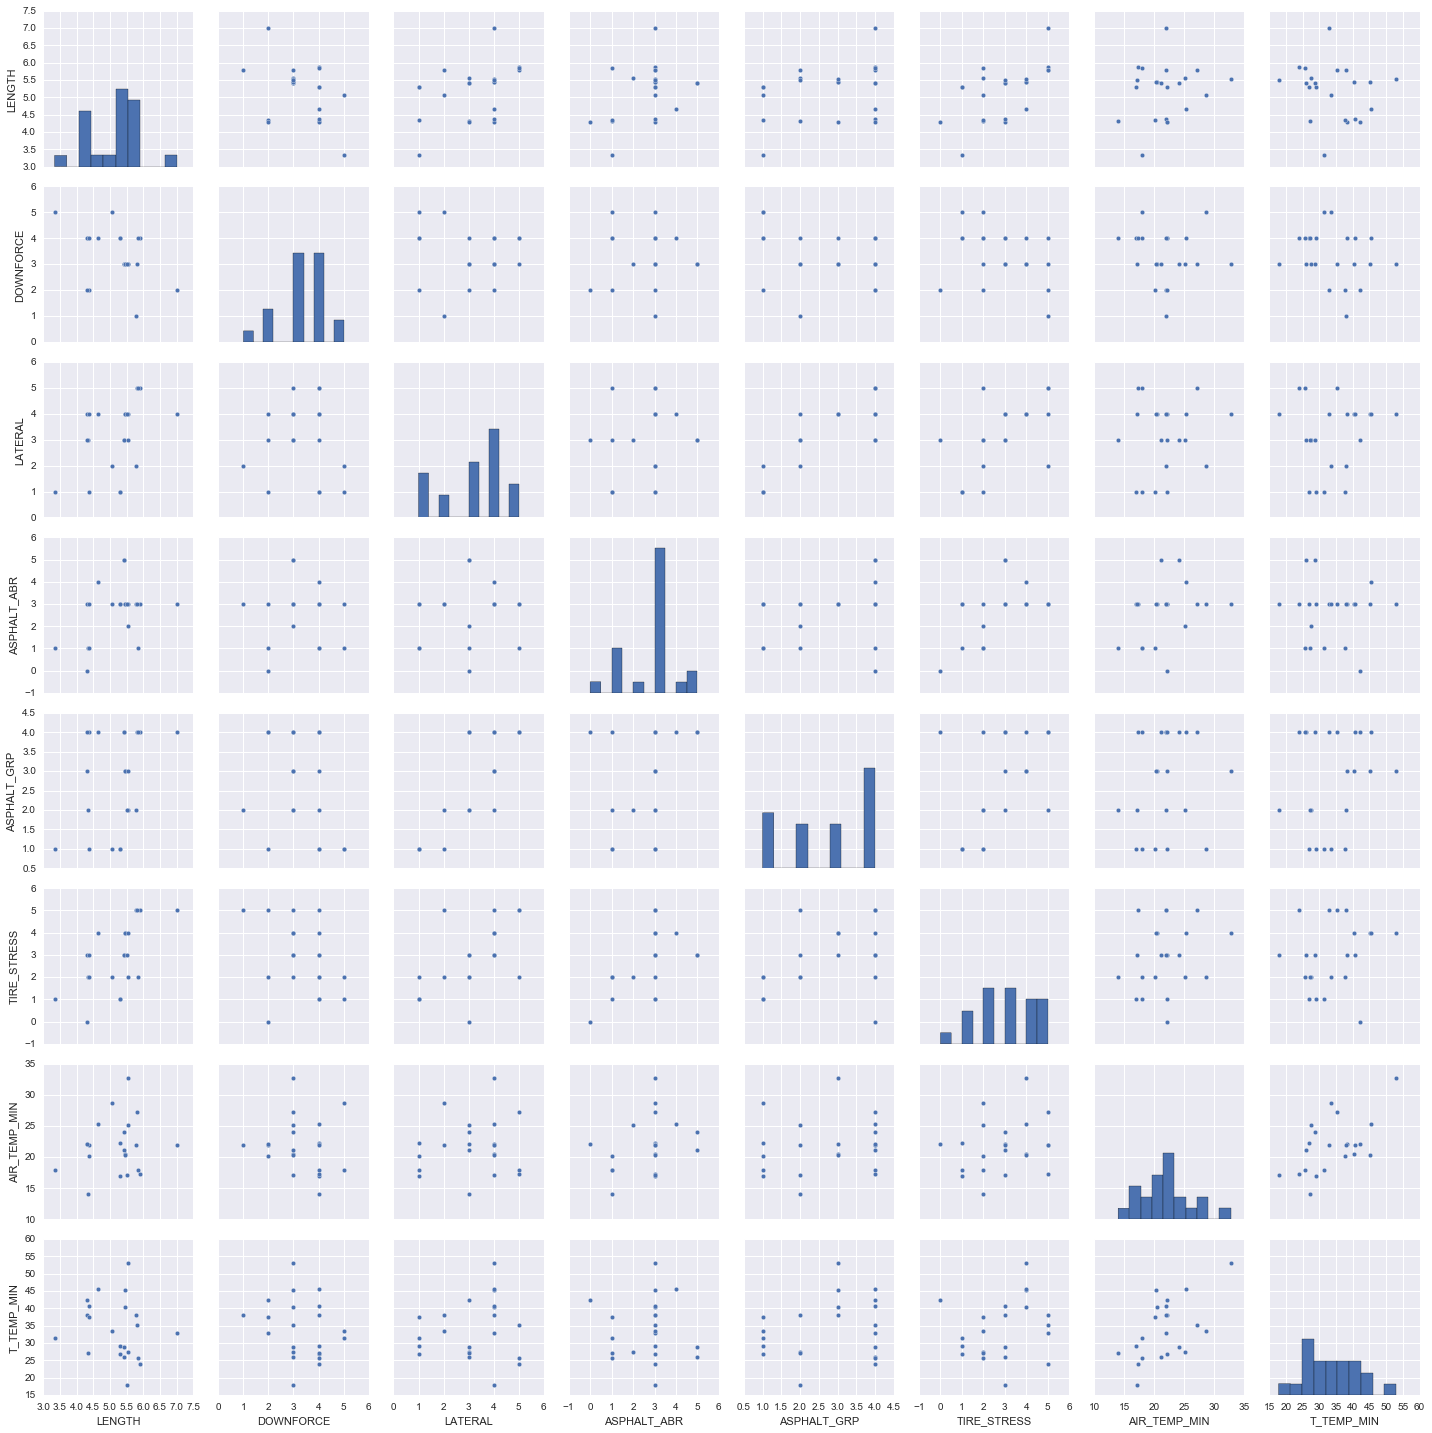

In [148]:
sn.pairplot(X)

In [144]:
df.columns

Index([u'NAME', u'YEAR', u'LENGTH', u'LAPS', u'DOWNFORCE', u'LATERAL',
       u'ASPHALT_ABR', u'ASPHALT_GRP', u'TIRE_STRESS', u'AIR_TEMP_MAX',
       u'AIR_TEMP_MIN', u'T_TEMP_MAX', u'T_TEMP_MIN', u'SECTOR_1', u'TIME_1',
       u'SECTOR_2', u'TIME_2', u'SECTOR_3', u'TIME_3', u'TIRE'],
      dtype='object')

In [145]:
cols = [u'LENGTH', u'DOWNFORCE', u'LATERAL',
       u'ASPHALT_ABR', u'ASPHALT_GRP', u'TIRE_STRESS',
       u'AIR_TEMP_MIN', u'T_TEMP_MIN']
X = df[cols]
y = df['TIRE'].map({'Ultra': 1, 'Super': 2, 'Soft': 3, 'Medium': 4, 'Hard': 5})
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [146]:
model = sms.OLS(y_train, X_train).fit()
summary = model.summary()

In [147]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TIRE   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     53.88
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           3.69e-06
Time:                        09:52:23   Log-Likelihood:                -8.9819
No. Observations:                  16   AIC:                             33.96
Df Residuals:                       8   BIC:                             40.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
LENGTH           0.3870      0.171      2.262      0.054        -0.008     0.781
DOWNFORCE        0.1758      0.150      1.175      0.274        -0.169     0.521
LATERAL          0.0531      0.269      0.197      0.849        -0.567     0.674
ASPHALT_ABR      0.0485      0.195      0.249      0.810        -0.401     0.498
ASPHALT_GRP     -0.0339      0.250     -0.136      0.896        -0.611     0.543
TIRE_STRESS     -0.0616      0.208     -0.296      0.774        -0.541     0.418
AIR_TEMP_MIN    -0.0126      0.057     -0.223      0.829        -0.144     0.118
T_TEMP_MIN       0.0236      0.027      0.860      0.415        -0.040     0.087
==============================================================================
Omnibus:                        2.833   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                1.681
Skew:                           0.793   Prob(JB):                        0.432
Kurtosis:                       2.936   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-0.80065984489078967

In [166]:
zip(y_predict, y_test)

[(3.2256870854293247, 3),
 (3.2350667746340034, 4),
 (2.9064673295008161, 3),
 (2.6947271321938766, 4),
 (3.1380449479909367, 3),
 (3.1824287966357243, 3)]